In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
import h5py

import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    

In [2]:
import openpyxl as pyxl

wb = pyxl.load_workbook("data/CraftsburyData6_11_17-10_2_17.xlsx")

print(wb.get_sheet_names())
sheet = wb.get_sheet_by_name('Sheet1')
sheet.title
sheet['A1'].value

['Sheet1']


/Users/dubief/anaconda/lib/python3.6/site-packages/openpyxl/reader/worksheet.py:307: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


'Time (UTC)'

In [3]:
multiple_cells = sheet['A1':'B3']
for row in multiple_cells:
    for cell in row:
        print(cell.value)

Time (UTC)
Barometric Pressure (mbar)
2017-06-11 17:48:00
1007.8
2017-06-11 17:57:00
None


In [37]:
rows = sheet.max_row
print(rows)
columns = sheet.max_column
print(columns)

T = []
date = []
i = 0
for rowOfCellObjects in sheet['C2':'C'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T.append(cellObj.value)
for rowOfCellObjects in sheet['A2':'A'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        date.append(cellObj.value)


10787
13


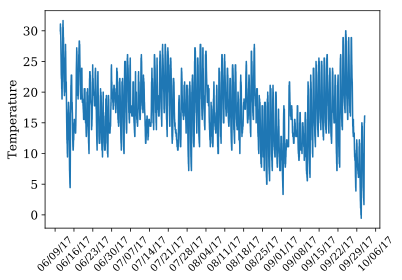

In [59]:
from matplotlib.dates import WEEKLY, DateFormatter, rrulewrapper, RRuleLocator, drange
import numpy as np
import datetime
from scipy.constants import convert_temperature
# print(T)
T_C = np.asarray(T)
mask = (T_C == np.array(None))
# Tmask = np.where(T_C == None)
T_C[mask] = 0.
for i in range(len(T_C)):
    if mask[i]:
        T_C[i] = T_C[i-1] # not the best way to fill the missing data, will code interpolation later
T_C = convert_temperature(T_C,'Fahrenheit','Celsius')
# print(T_C)
rule = rrulewrapper(WEEKLY)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

fig, ax = plt.subplots()
plt.plot(date, T_C)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10)
plt.ylabel(r"Temperature")

plt.show()

In [66]:
import pandas as pd

# Create an empty dataframe
df = pd.DataFrame()

# Create a column from the datetime variable
df['datetime'] = date
# Convert that column into a datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])
# Set the datetime column as the index
df.index = df['datetime'] 
# Create a column from the numeric score variable
df['temperature'] = T_C

df['temperature'] = df['temperature'].astype(float)

In [67]:
df.head

<bound method NDFrame.head of                                datetime temperature
datetime                                           
2017-06-11 17:48:00 2017-06-11 17:48:00          30
2017-06-11 17:57:00 2017-06-11 17:57:00          30
2017-06-11 18:05:00 2017-06-11 18:05:00          30
2017-06-11 18:20:00 2017-06-11 18:20:00     30.5556
2017-06-11 18:36:00 2017-06-11 18:36:00     30.5556
2017-06-11 18:51:00 2017-06-11 18:51:00     31.1111
2017-06-11 19:06:00 2017-06-11 19:06:00     30.5556
2017-06-11 19:21:00 2017-06-11 19:21:00     30.5556
2017-06-11 19:36:00 2017-06-11 19:36:00          30
2017-06-11 19:51:00 2017-06-11 19:51:00     29.4444
2017-06-11 20:06:00 2017-06-11 20:06:00     29.4444
2017-06-11 20:21:00 2017-06-11 20:21:00     30.5556
2017-06-11 20:36:00 2017-06-11 20:36:00     30.5556
2017-06-11 20:51:00 2017-06-11 20:51:00     30.5556
2017-06-11 21:06:00 2017-06-11 21:06:00     30.5556
2017-06-11 21:21:00 2017-06-11 21:21:00          30
2017-06-11 21:36:00 2017-06-11 21:

In [70]:
#Monthly average
df.resample('W').mean()

,temperature
datetime,
2017-06-11,29.358974
2017-06-18,18.981619
2017-06-25,18.349064
2017-07-02,16.468195
2017-07-09,18.306011
2017-07-16,17.715589
2017-07-23,20.156843
2017-07-30,15.904123
2017-08-06,19.120232
